<a href="https://colab.research.google.com/github/abhilashhn1993/Sentiment_Analysis_of_Tweets/blob/master/LDATopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install spacy
!pip install pyLDAvis
!pip install wordcloud

In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [0]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io
df_pre = pd.read_csv(io.BytesIO(uploaded['cleanedPreTweets.csv']))
df_post = pd.read_csv(io.BytesIO(uploaded['cleanedPostTweets.csv']))

**Word cloud for both Pre and Post Diagnosis**

In [0]:
pre_diag_words = ''.join([str(text) for text in df_pre['Tweets']])
post_diag_words = ''.join([str(text) for text in df_post['Tweets']])

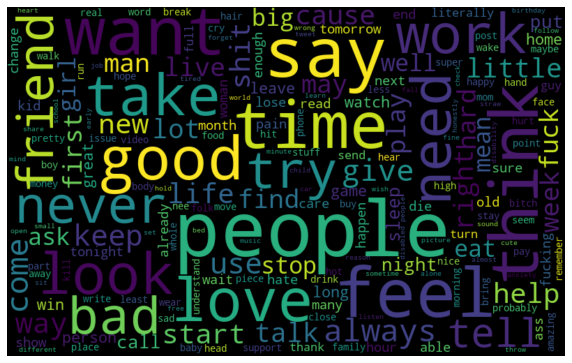

In [45]:
pre_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(pre_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

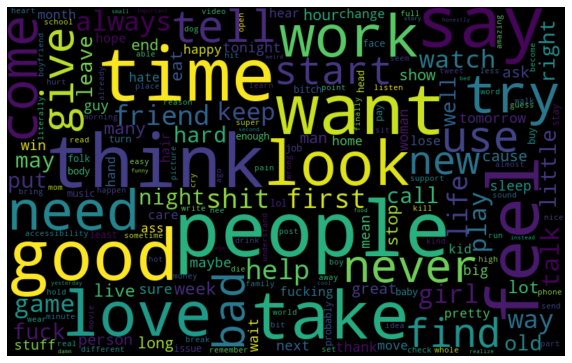

In [46]:
post_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(post_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**LDA topic Modeling for PTSD pre-diagnosis Tweets**

**Pre-PTSD Topics**

In [0]:
pre_Tweets = df_pre.Tweets.values.tolist()
pre_Tweets = list(sent_to_words(pre_Tweets))

In [0]:
id2word = corpora.Dictionary(pre_Tweets)

# Create Corpus
texts = pre_Tweets

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [0]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [0]:
# Build LDA model
pre_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=4, 
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha='auto',
                                          per_word_topics=True)

In [0]:
pprint(pre_lda_model.print_topics())
doc_lda_pre = pre_lda_model[corpus]

[(0,
  '0.107*"nan" + 0.016*"hate" + 0.016*"wait" + 0.015*"tell" + 0.015*"eat" + '
  '0.013*"could" + 0.012*"lose" + 0.011*"stop" + 0.009*"ill" + '
  '0.008*"chroniclife"'),
 (1,
  '0.025*"think" + 0.022*"life" + 0.018*"come" + 0.015*"help" + 0.015*"fuck" + '
  '0.015*"always" + 0.014*"honestly" + 0.012*"keep" + 0.012*"right" + '
  '0.011*"literally"'),
 (2,
  '0.037*"good" + 0.031*"say" + 0.018*"look" + 0.018*"friend" + 0.017*"work" + '
  '0.016*"thank" + 0.014*"ever" + 0.013*"cry" + 0.013*"fucking" + '
  '0.012*"hour"'),
 (3,
  '0.034*"want" + 0.034*"love" + 0.030*"feel" + 0.025*"people" + 0.024*"time" '
  '+ 0.022*"need" + 0.017*"take" + 0.016*"bad" + 0.016*"try" + 0.015*"start"')]


In [0]:
# Compute Perplexity
print('\nPerplexity: ', pre_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=pre_lda_model, texts=pre_Tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.413445944372059

Coherence Score:  0.2780846378522641


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(pre_lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.302868  0.019760       1        1  29.724173
0     -0.120523  0.266956       2        1  24.382010
2     -0.089169 -0.131211       3        1  23.176790
1     -0.093177 -0.155505       4        1  22.717026, topic_info=              Term         Freq        Total Category  logprob  loglift
27             nan  3018.000000  3018.000000  Default  30.0000  30.0000
0             good   992.000000   992.000000  Default  29.0000  29.0000
93            want  1180.000000  1180.000000  Default  28.0000  28.0000
204           love  1163.000000  1163.000000  Default  27.0000  27.0000
133           feel  1031.000000  1031.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
250           many   159.414322   160.124710   Topic4  -5.1022   1.4776
800         better   166.099686   166.842880   Topic4  -5.0612   1.4776
1686        weight   200.536392   201.575226   Topic4  -4.8727   1.4769
783          daddy   221.229156   223.636337   Topic4  -4.7745   1.4712
10345  chroniclife   241.172928  1085.982910   Topic4  -4.6882  -0.0227

[159 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
473       2  0.997567     able
230       4  0.997744  already
54        1  0.997142     also
5         4  0.998120   always
370       2  0.991633  anymore
...     ...       ...      ...
348       4  0.995988     week
1686      4  0.997146   weight
299       3  0.997088     well
108       3  0.998958     work
273       4  0.994703    wrong

[132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

**Post Diagnosis Topics**

In [0]:
post_Tweets = df_post.Tweets.values.tolist()
post_Tweets = list(sent_to_words(post_Tweets))

In [0]:
id2word = corpora.Dictionary(post_Tweets)

# Create Corpus
texts = post_Tweets

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [0]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [0]:
# Build LDA model
post_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=4, 
                                          random_state=100,
                                          update_every=1,
                                          chunksize=100,
                                          passes=10,
                                          alpha='auto',
                                          per_word_topics=True)

In [0]:
pprint(post_lda_model.print_topics())
doc_lda_post = post_lda_model[corpus]

[(0,
  '0.029*"good" + 0.027*"need" + 0.019*"shit" + 0.016*"try" + 0.015*"tell" + '
  '0.014*"talk" + 0.013*"girl" + 0.013*"could" + 0.012*"tonight" + '
  '0.011*"find"'),
 (1,
  '0.100*"nan" + 0.031*"love" + 0.024*"think" + 0.017*"thank" + 0.015*"bad" + '
  '0.011*"call" + 0.010*"fucking" + 0.009*"ask" + 0.009*"use" + 0.008*"new"'),
 (2,
  '0.041*"want" + 0.040*"time" + 0.029*"people" + 0.026*"take" + 0.020*"work" '
  '+ 0.016*"start" + 0.014*"watch" + 0.013*"give" + 0.011*"hit" + 0.011*"lol"'),
 (3,
  '0.029*"say" + 0.029*"feel" + 0.018*"look" + 0.016*"life" + 0.016*"come" + '
  '0.016*"friend" + 0.015*"help" + 0.014*"never" + 0.012*"right" + '
  '0.012*"also"')]


In [0]:
# Compute Perplexity
print('\nPerplexity: ', post_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=post_lda_model, texts=post_Tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.422046389754199

Coherence Score:  0.3214387529798701


In [0]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(post_lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.186982  0.221518       1        1  26.626789
0      0.274451  0.099511       2        1  25.556433
3     -0.045137 -0.185164       3        1  24.535534
2     -0.042332 -0.135865       4        1  23.281252, topic_info=        Term         Freq        Total Category  logprob  loglift
0        nan  3853.000000  3853.000000  Default  30.0000  30.0000
9       want  1388.000000  1388.000000  Default  29.0000  29.0000
42      time  1334.000000  1334.000000  Default  28.0000  28.0000
48      love  1193.000000  1193.000000  Default  27.0000  27.0000
39       say  1044.000000  1044.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
800    ready   162.467041   163.243271   Topic4  -5.3314   1.4528
1437     ago   161.980560   162.770004   Topic4  -5.3344   1.4527
314      sex   177.739426   178.620682   Topic4  -5.2415   1.4526
1251  lovely   185.464096   186.539703   Topic4  -5.1990   1.4517
607    point   163.009415   163.824387   Topic4  -5.3281   1.4525

[156 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1437      4  0.995269     ago
312       4  0.996975  almost
52        3  0.997674    also
210       3  0.996990  always
1028      1  0.998077     ask
...     ...       ...     ...
346       3  0.996977    week
101       2  0.996834    well
994       2  0.994041   whole
186       4  0.999549    work
742       3  0.997009   wrong

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])